<a href="https://colab.research.google.com/github/ihyaulumuddin044/ML_Portofolio/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Ihya_ulumuddin_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from mpl_toolkits.mplot3d import Axes3D


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Type your code here
df = pd.read_csv('Kesejahteran_ID.csv')
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226


### informasi:

* data tersebut sudah di gabung(marged) untuk mempermudah dalam analisa dan pembuatan model
* menghapus data agregat yang tidak perlu

In [ ]:
df_updated = df[
    (df['provinsi'] != 'INDONESIA') &
    (df['jenis'] != 'TOTAL') &
    (df['daerah'] != 'PERDESAANPERKOTAAN')
].reset_index(drop=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##1. Memahami Struktur Data

In [ ]:
#Type your code here
df_updated.shape

(2176, 9)

In [ ]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  2176 non-null   object 
 1   jenis     2176 non-null   object 
 2   daerah    2176 non-null   object 
 3   tahun     2176 non-null   int64  
 4   periode   2176 non-null   object 
 5   gk        2144 non-null   float64
 6   ump       2176 non-null   float64
 7   peng      2144 non-null   float64
 8   upah      2176 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 153.1+ KB


In [ ]:
df_updated.describe()

,tahun,gk,ump,peng,upah
count,2176.000000,2144.000000,2.176000e+03,2.144000e+03,2176.000000
mean,2018.500000,228034.756530,2.310701e+06,5.701367e+05,16651.562500
std,2.291815,126370.388039,6.083094e+05,1.781897e+05,4410.468772
min,2015.000000,48561.000000,9.100000e+05,1.760280e+05,8525.000000
25%,2016.750000,111752.000000,1.873750e+06,4.342870e+05,13445.500000
50%,2018.500000,212337.000000,2.267356e+06,5.584700e+05,15856.500000
75%,2020.250000,327492.500000,2.699206e+06,6.790842e+05,18863.000000
max,2022.000000,641806.000000,4.641854e+06,1.572026e+06,32685.000000


### informasi:

* Jumlah Baris: 5040 (berdasarkan informasi sebelumnya)
* Jumlah Kolom: 9
* Jumlah Baris: 2176 (berdasarkan informasi terupdate setelah menghapus agregasi)
* Jumlah Kolom Kategorikal: 5 (provinsi, jenis, daerah, tahun, periode)
* Jumlah Kolom Numerikal: 4 (gk, ump, peng, upah)


##2. Menangani Data Yang Hilang

In [ ]:
print(f'data yang hilang: \n{df_updated.isnull().sum()}')

data yang hilang: 
provinsi     0
jenis        0
daerah       0
tahun        0
periode      0
gk          32
ump          0
peng        32
upah         0
dtype: int64


In [ ]:
print(f'data yang terduplikat: \n{df_updated.duplicated().sum()}')

data yang terduplikat: 
0


### informasi:

* data pada kolom(fitur) gk hilang sebanyak 32
* data pada kolom(fitur) peng hilang sebanyak 32
* tidak terdapat data yang terduplikat


## 3. Analisis Distribusi dan Korelasi

In [ ]:
numerical_cols = ['gk', 'ump', 'peng', 'upah']
print(df_updated[numerical_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gk      2144 non-null   float64
 1   ump     2176 non-null   float64
 2   peng    2144 non-null   float64
 3   upah    2176 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 68.1 KB
None


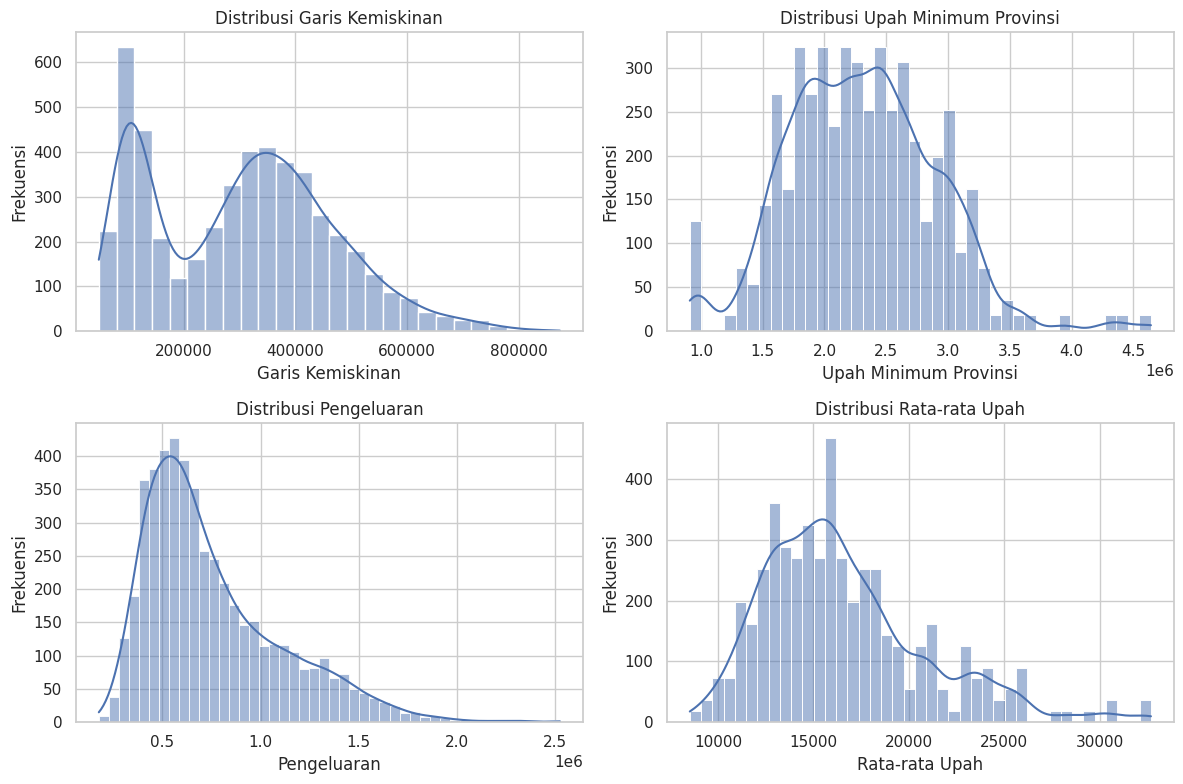

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['gk', 'ump', 'peng', 'upah']
new_labels = {
    'gk': 'Garis Kemiskinan',
    'ump': 'Upah Minimum Provinsi',
    'peng': 'Pengeluaran',
    'upah': 'Rata-rata Upah'
}

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {new_labels[col]}')
    plt.xlabel(new_labels[col])
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### informasi:
* terdapat ekor distribusi yang memanjang ke kanan dan sebagian besar observasi terpusat pada nilai-nilai yang rendah
* hampir mendekati distribusi normal tetapi masih cenderung condong ke nilai yang lebih besar dan punya kemiringan kekanan(right skewness) yang cukup jelas
* pola distribusi menunjukkan karakteristik yang hampir mirip dengan garis kemiskinan. data juga cenderung miring ke kanan(right skewness) dengan jelas
* meskipun rata-rata upah mendekati bentuk normal tetapi distribusi masih menunjukkan ke condongan ke arah kanan yang lebih panjang

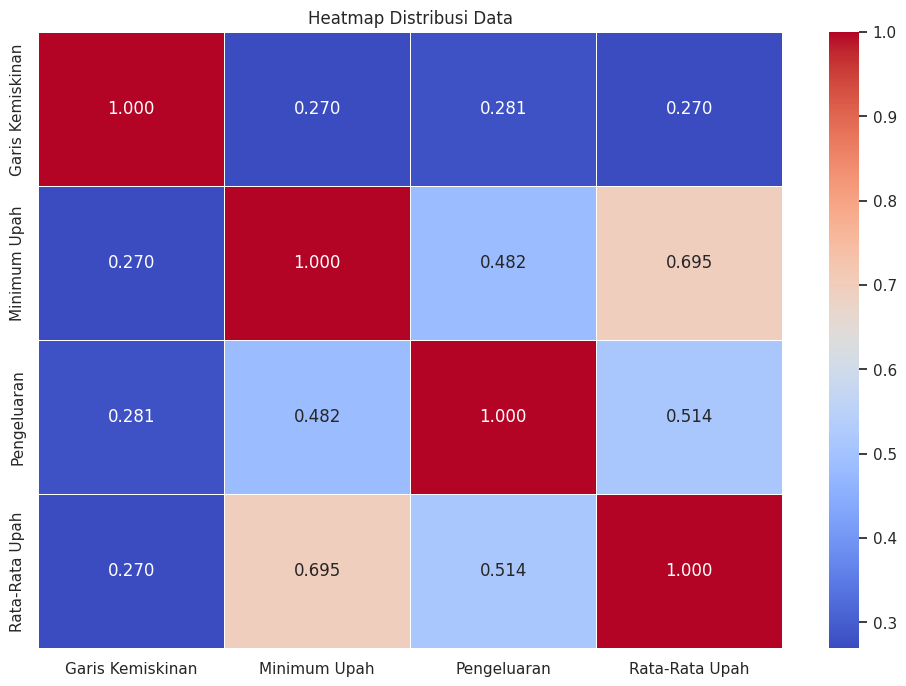

In [ ]:
labels = ["Garis Kemiskinan", "Minimum Upah", "Pengeluaran", "Rata-Rata Upah"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_updated[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5, xticklabels=labels, yticklabels=labels)
plt.title("Heatmap Distribusi Data")
plt.xlabel(None)
plt.show()


### informasi:

Dari heatmap ini, kita dapat menyimpulkan beberapa hal:

* Tidak ada korelasi negatif yang kuat antar variabel.
* Korelasi positif terkuat terlihat antara Minimum Upah dan Rata-Rata Upah. Ini masuk akal karena upah minimum seringkali menjadi dasar atau mempengaruhi tingkat upah secara keseluruhan.
* Minimum Upah dan Rata-Rata Upah juga memiliki korelasi positif yang moderat dengan Pengeluaran.
* Garis Kemiskinan menunjukkan korelasi positif yang lemah dengan semua variabel upah dan pengeluaran.

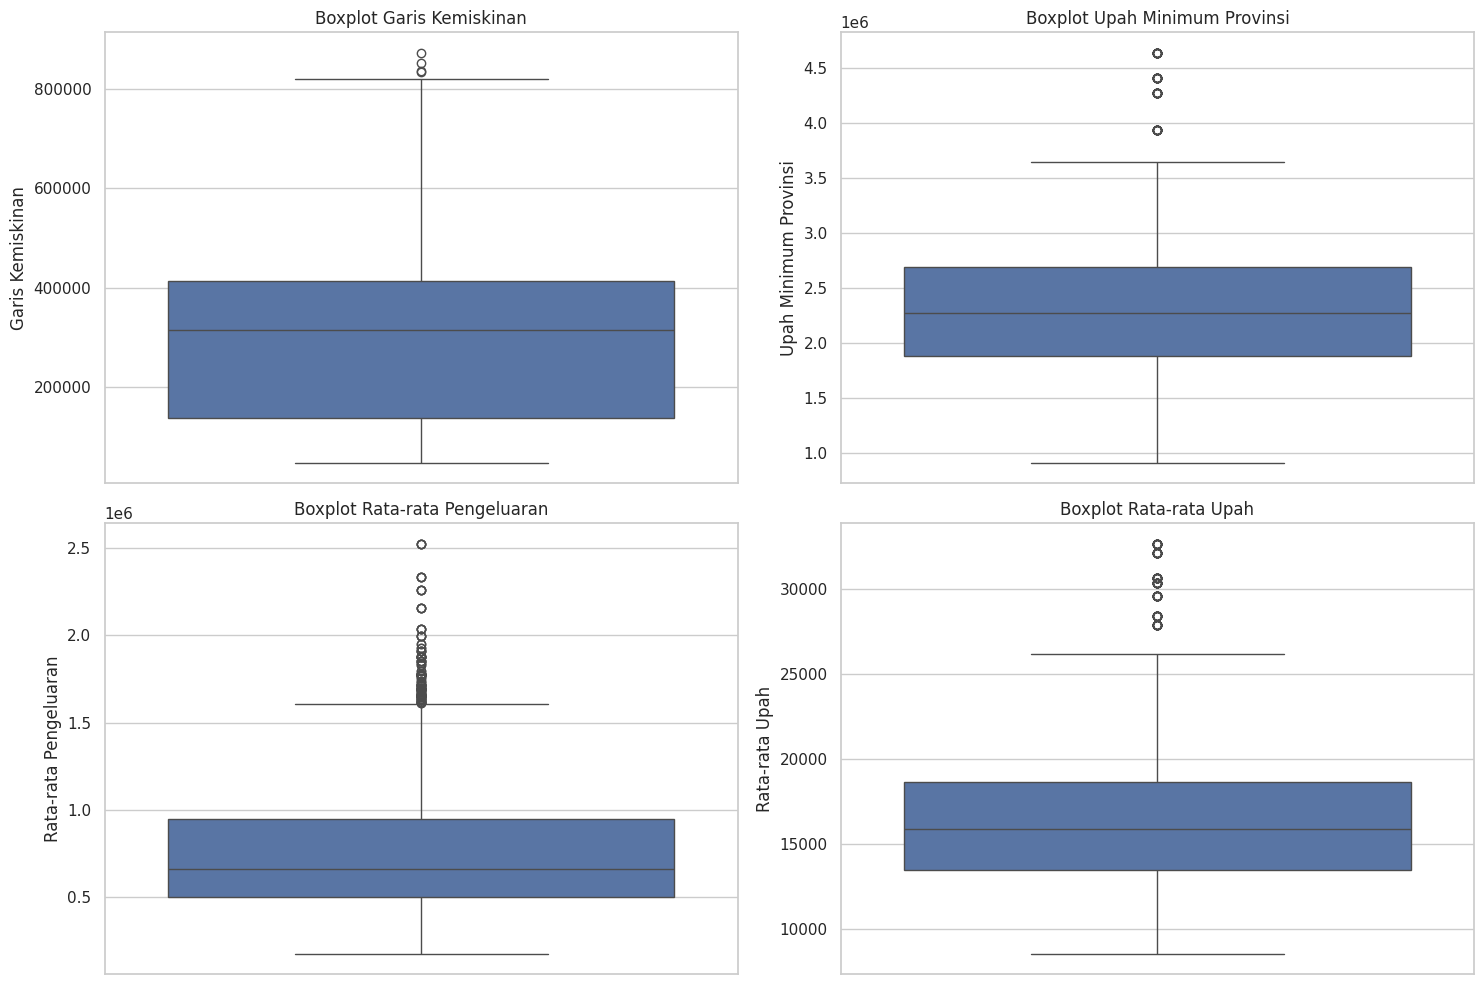

In [ ]:
numerical_cols_renamed = {
    'gk': 'Garis Kemiskinan',
    'ump': 'Upah Minimum Provinsi',
    'peng': 'Rata-rata Pengeluaran',
    'upah': 'Rata-rata Upah'
}

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_renamed):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {numerical_cols_renamed[col]}')
    plt.ylabel(numerical_cols_renamed[col])
plt.tight_layout()
plt.show()

### informasi:
* melihat outlier pada data

## 4. Visualisasi Data

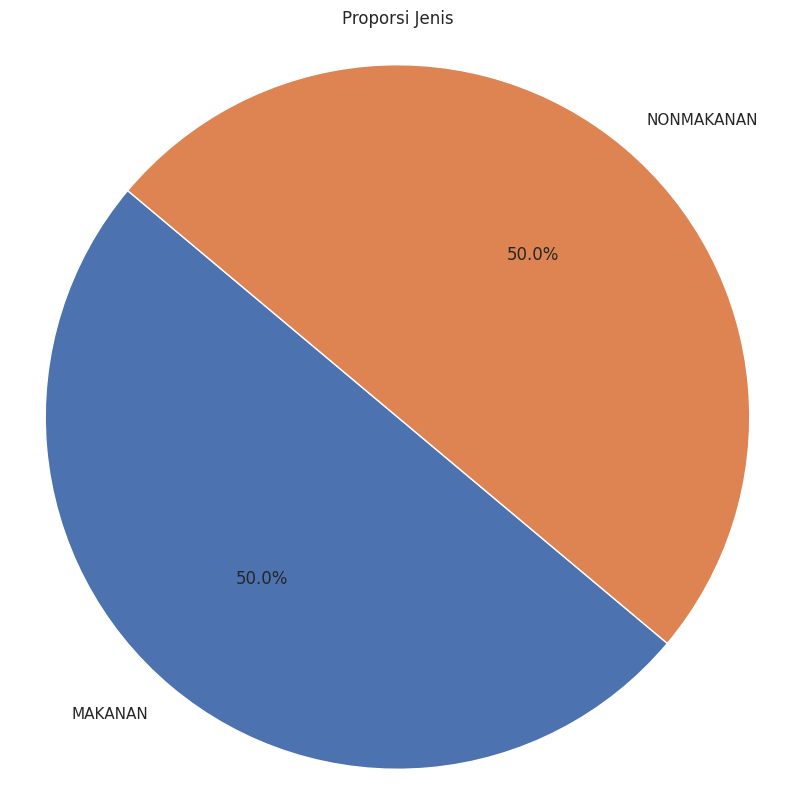

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_updated['jenis'].value_counts(), labels=df_updated['jenis'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Jenis')
plt.axis('equal')
plt.show()

### informasi:
* informasi mengenai total presentase jenis dengan pie chart

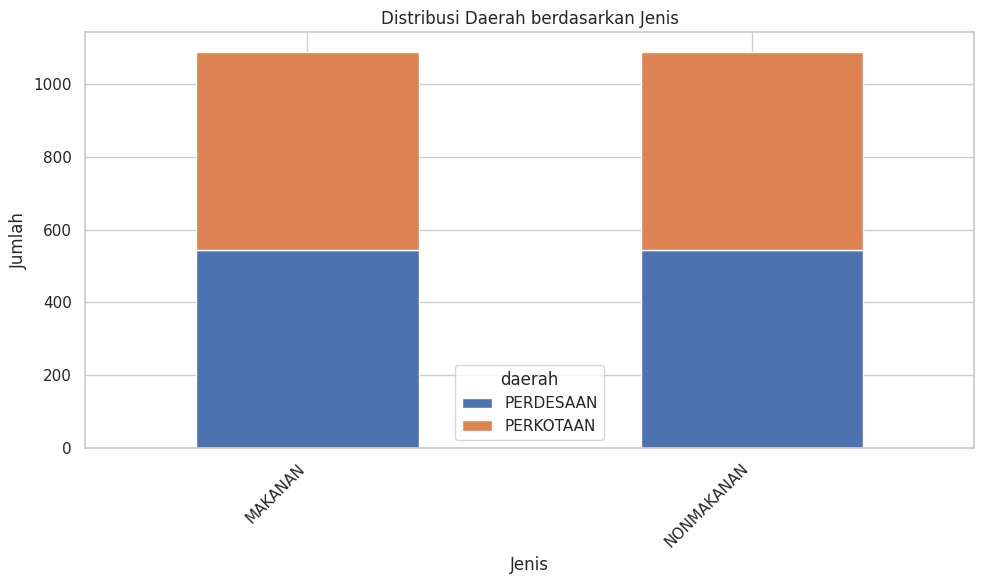

In [ ]:
cross_tab_jenis_daerah = pd.crosstab(df_updated['jenis'], df_updated['daerah'])
cross_tab_jenis_daerah.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Daerah berdasarkan Jenis')
plt.xlabel('Jenis')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

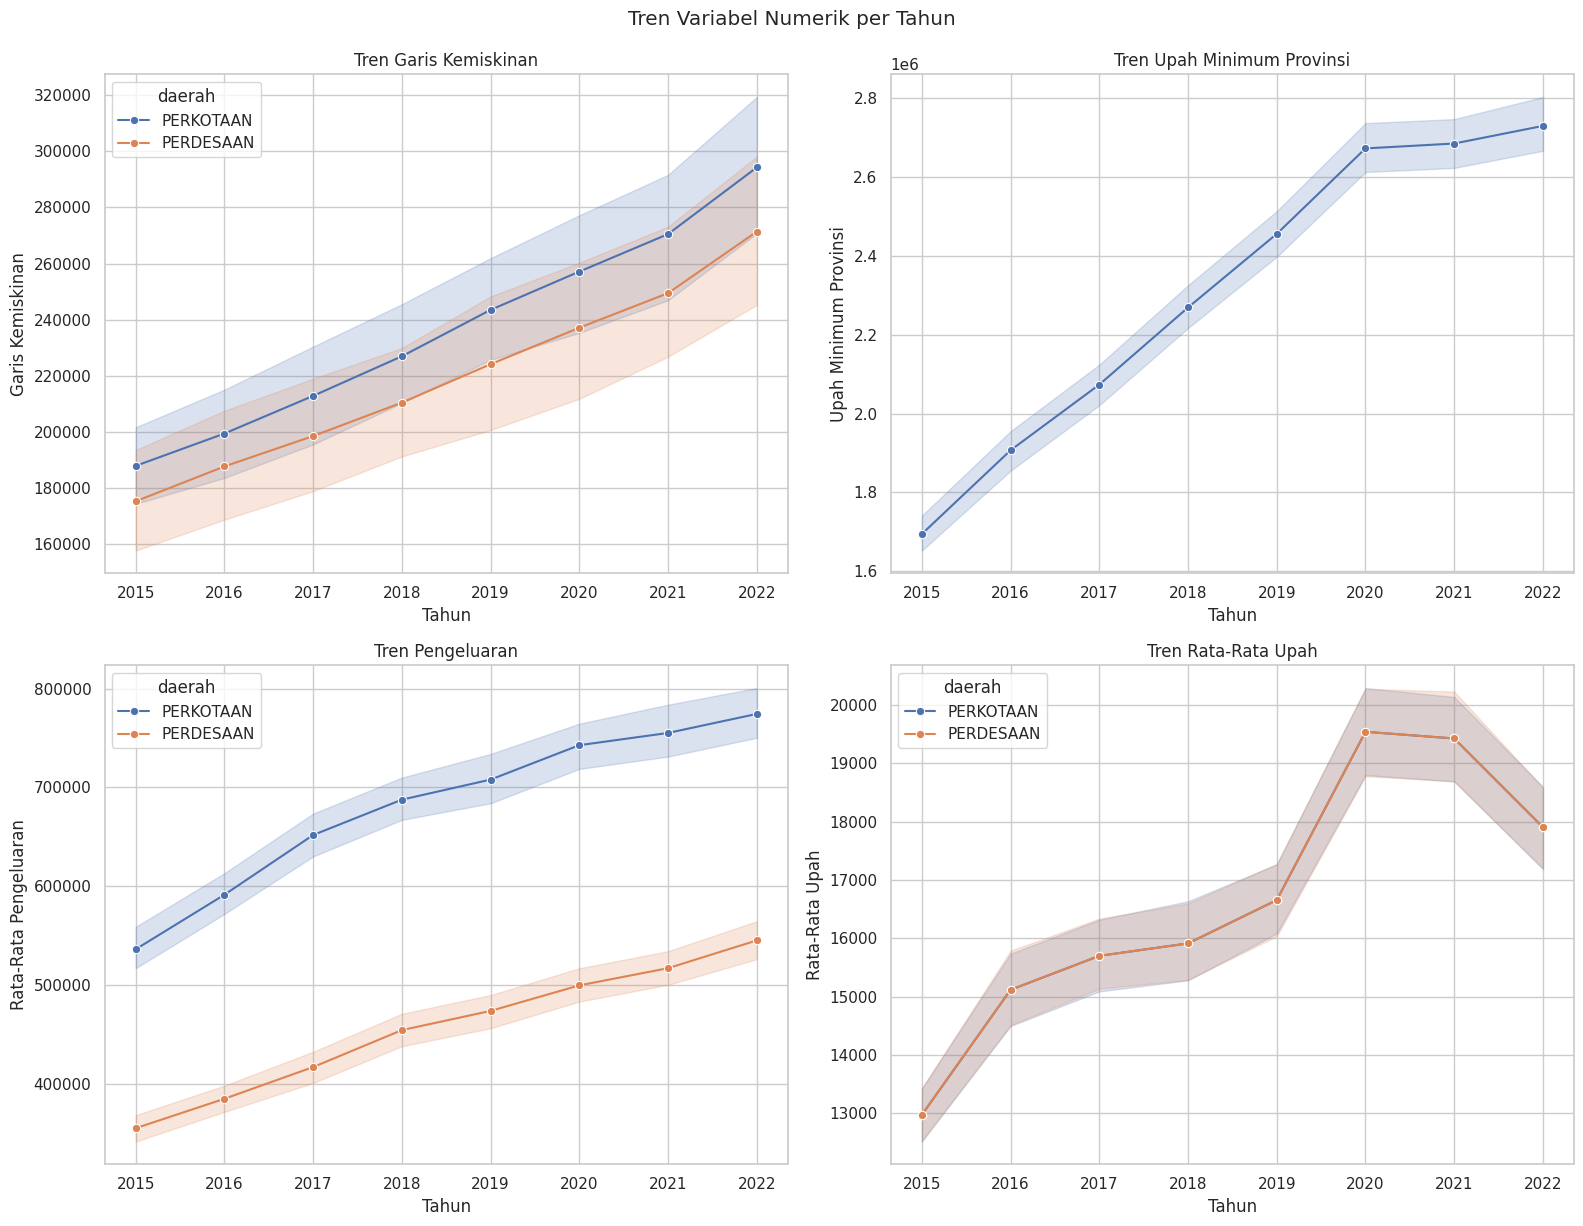

In [ ]:
plt.figure(figsize=(16, 12))
sns.set_theme(style="whitegrid")


plt.subplot(2, 2, 1)
sns.lineplot(x='tahun', y='gk', hue='daerah', data=df_updated, marker='o')
plt.title('Tren Garis Kemiskinan')
plt.xlabel('Tahun')
plt.ylabel('Garis Kemiskinan')


plt.subplot(2, 2, 2)
sns.lineplot(x='tahun', y='ump', data=df_updated, marker='o')
plt.title('Tren Upah Minimum Provinsi')
plt.xlabel('Tahun')
plt.ylabel('Upah Minimum Provinsi')


plt.subplot(2, 2, 3)
sns.lineplot(x='tahun', y='peng', hue='daerah', data=df_updated, marker='o')
plt.title('Tren Pengeluaran')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Pengeluaran')


plt.subplot(2, 2, 4)
sns.lineplot(x='tahun', y='upah', hue='daerah', data=df_updated, marker='o')
plt.title('Tren Rata-Rata Upah')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Upah')

plt.tight_layout()
plt.suptitle('Tren Variabel Numerik per Tahun', y=1.02)
plt.show()

### informasi:
* 1. Tren Garis Kemiskinan per Tahun berdasarkan Daerah
* 2. Tren Upah Minimum Provinsi per Tahun
* 3. Tren Rata-Rata Pengeluaran per Tahun berdasarkan Daerah
* 4. Tren Rata-Rata Upah per Tahun berdasarkan Daerah

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [ ]:
#Type your code here
print(df_updated.isnull().sum())

provinsi     0
jenis        0
daerah       0
tahun        0
periode      0
gk          32
ump          0
peng        32
upah         0
dtype: int64


In [ ]:
# Hitung median untuk kolom 'gk'
median_gk = df['gk'].median()

# Isi nilai NaN di kolom 'gk' dengan median
df['gk'].fillna(median_gk, inplace=True)

# Hitung median untuk kolom 'peng'
median_peng = df['peng'].median()

# Isi nilai NaN di kolom 'peng' dengan median
df['peng'].fillna(median_peng, inplace=True)

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'gk' dan 'peng'
print(df[['gk', 'peng']].isnull().sum())



gk      0
peng    0
dtype: int64


<ipython-input-444-6d07ef7765ae>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gk'].fillna(median_gk, inplace=True)
<ipython-input-444-6d07ef7765ae>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

### informasi:
* mengisi nilai kosong dengan median

## 2. Menghapus Data Duplikat

In [ ]:
print(f'Jumlah data duplikat: {df_updated.duplicated().sum()}')

Jumlah data duplikat: 0


## 3. Normalisasi atau Standarisasi Fitur

In [ ]:
df_updated.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226


In [ ]:
normalize_cols_minmax = ['gk', 'ump', 'peng', 'upah']
df_normalized = df_updated.copy()
scaler_minmax = MinMaxScaler()

# Fit dan transform kolom-kolom yang dipilih menggunakan MinMaxScaler
df_normalized[normalize_cols_minmax] = scaler_minmax.fit_transform(df_normalized[normalize_cols_minmax])

# Tampilkan beberapa baris pertama DataFrame setelah Min-Max Scaling
print("DataFrame setelah Min-Max Scaling:")
print(df_normalized.head())

DataFrame setelah Min-Max Scaling:
  provinsi    jenis     daerah  tahun    periode        gk       ump  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  0.413212  0.265284   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  0.427424  0.265284   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  0.434360  0.323834   
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  0.457159  0.323834   
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  0.419587  0.265284   

       peng      upah  
0  0.207971  0.111796  
1  0.207971  0.111796  
2  0.267067  0.211175  
3  0.267067  0.211175  
4  0.156954  0.111796  


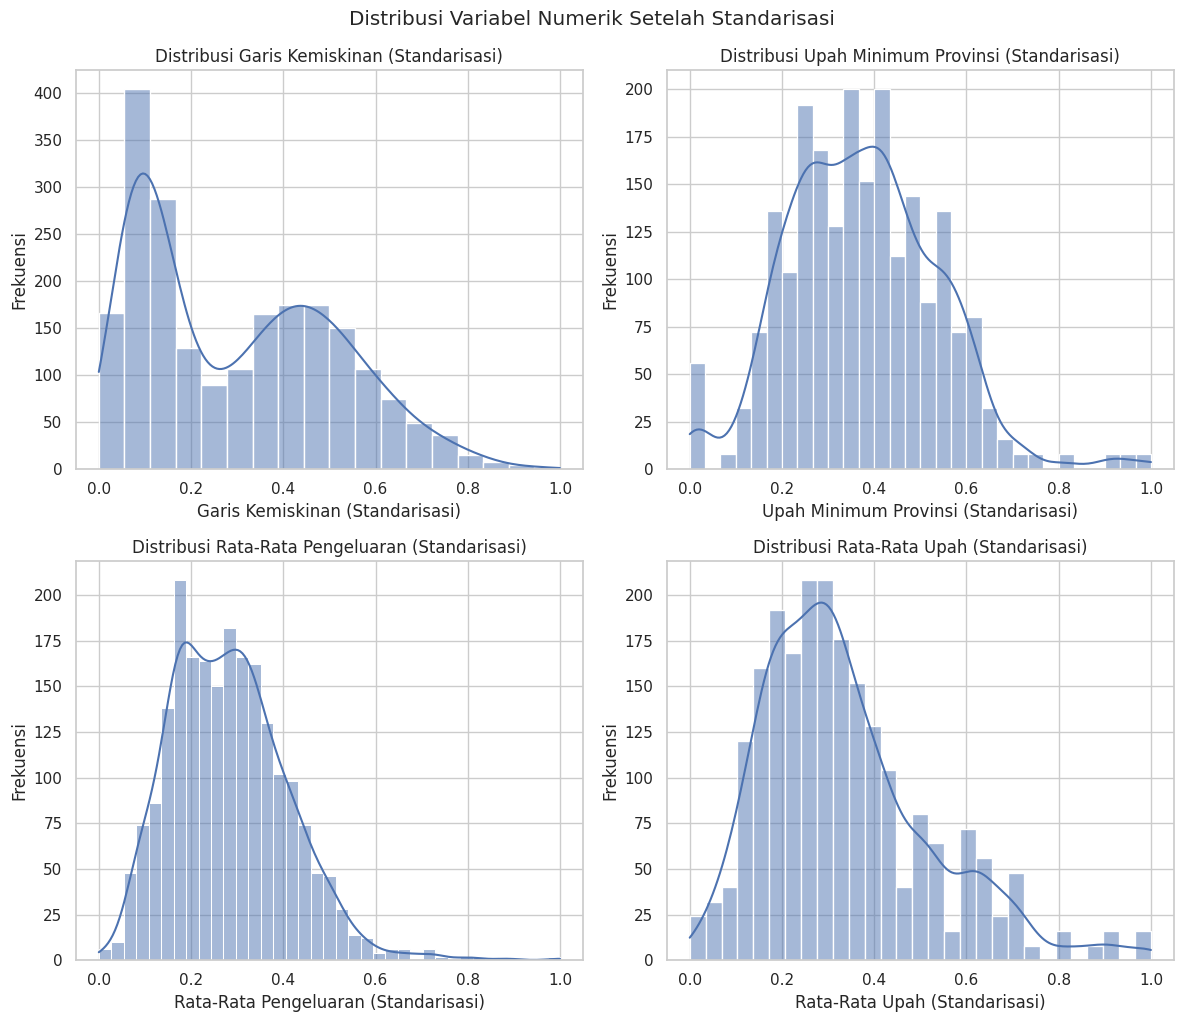

In [ ]:
normalize_cols_renamed = {
    'gk': 'Garis Kemiskinan (Standarisasi)',
    'ump': 'Upah Minimum Provinsi (Standarisasi)',
    'peng': 'Rata-Rata Pengeluaran (Standarisasi)',
    'upah': 'Rata-Rata Upah (Standarisasi)'
}
normalize_cols = list(normalize_cols_renamed.keys())

plt.figure(figsize=(12, 10))
for i, col in enumerate(normalize_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_normalized[col], kde=True)
    plt.title(f'Distribusi {normalize_cols_renamed[col]}')
    plt.xlabel(normalize_cols_renamed[col])
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik Setelah Standarisasi', y=1.02)
plt.show()

## 4. Deteksi dan Penanganan Outlier

In [ ]:
def calculate_iqr_bounds(series):
    """Menghitung batas bawah dan atas IQR untuk sebuah Series."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

def detect_outliers_iqr(series):
    """Mendeteksi outlier pada sebuah Series menggunakan metode IQR."""
    lower_bound, upper_bound = calculate_iqr_bounds(series)
    return series[(series < lower_bound) | (series > upper_bound)].count()

def clip_outliers_iqr(df, column):
    """Menangani outlier pada kolom DataFrame menggunakan metode IQR dengan clipping."""
    lower_bound, upper_bound = calculate_iqr_bounds(df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

numerical_cols = ['gk', 'ump', 'peng', 'upah']
# Menggunakan df_normalized sebagai pengganti df_capped_standardized karena belum didefinisikan
df_before_clip_iqr = df_normalized.copy()
df_after_clip_iqr = df_before_clip_iqr.copy()



In [ ]:
# Hitung jumlah outlier sebelum clipping
outliers_before = {}
for col in numerical_cols:
    outliers_before[col] = detect_outliers_iqr(df_before_clip_iqr[col])

print("Jumlah Outliers Sebelum Clipping (IQR):", outliers_before)

# Lakukan clipping outlier
for col in numerical_cols:
    df_after_clip_iqr = clip_outliers_iqr(df_after_clip_iqr, col)

# Hitung jumlah outlier setelah clipping
outliers_after = {}
for col in numerical_cols:
    outliers_after[col] = detect_outliers_iqr(df_after_clip_iqr[col])

print("Jumlah Outliers Setelah Clipping (IQR):", outliers_after)

Jumlah Outliers Sebelum Clipping (IQR): {'gk': np.int64(0), 'ump': np.int64(32), 'peng': np.int64(24), 'upah': np.int64(56)}
Jumlah Outliers Setelah Clipping (IQR): {'gk': np.int64(0), 'ump': np.int64(0), 'peng': np.int64(0), 'upah': np.int64(0)}


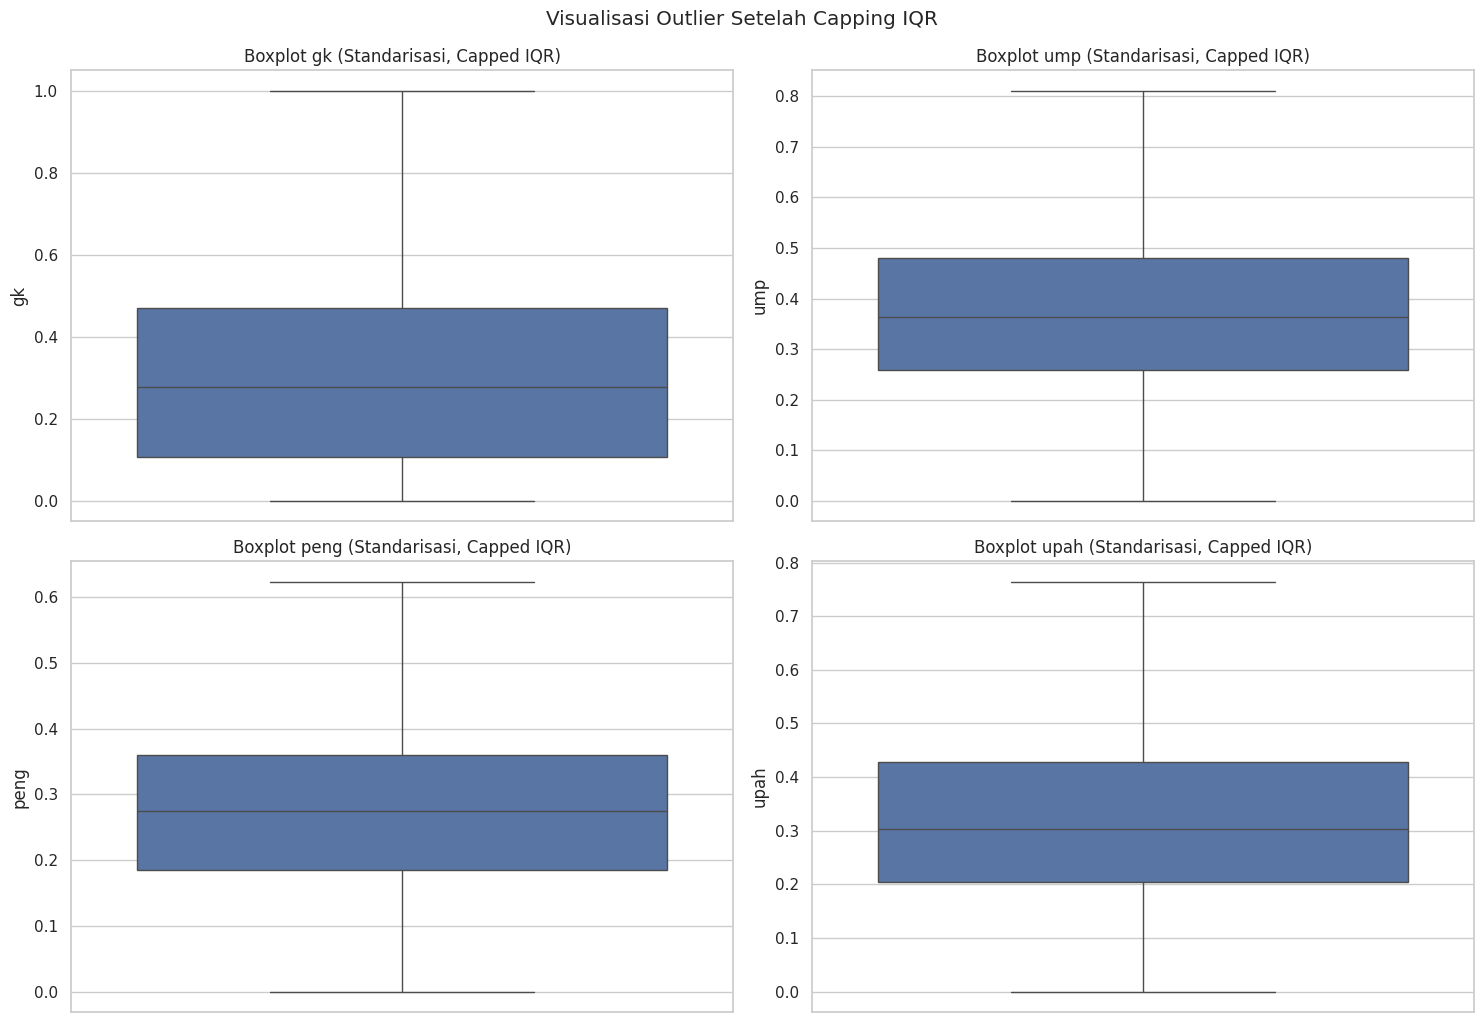

In [ ]:
# Visualisasikan boxplot setelah penanganan outlier IQR

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    # Ganti df_handled_iqr dengan df_after_clip_iqr
    sns.boxplot(y=df_after_clip_iqr[col])
    plt.title(f'Boxplot {col} (Standarisasi, Capped IQR)')
plt.tight_layout()
plt.suptitle('Visualisasi Outlier Setelah Capping IQR', y=1.02)
plt.show()

### informasi:
* sekarang outlier berhasil di tangani dengan tidak adanya outlier pada boxplot

## 5. Encoding Data Kategorikal

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop="first")

target = ["jenis", "daerah"]
encoded = encoder.fit_transform(df_normalized[target])
column_names = [str.lower(i) for i in [*encoder.get_feature_names_out()]]

df_normalized[column_names] = encoded

df_normalized.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,jenis_nonmakanan,daerah_perkotaan
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.413212,0.265284,0.207971,0.111796,0.0,1.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.427424,0.265284,0.207971,0.111796,0.0,1.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.434360,0.323834,0.267067,0.211175,0.0,1.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.457159,0.323834,0.267067,0.211175,0.0,1.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.419587,0.265284,0.156954,0.111796,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

df_model = df_normalized.copy()
features = df_model.select_dtypes(np.number).columns[1:]

df_model.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,jenis_nonmakanan,daerah_perkotaan
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.413212,0.265284,0.207971,0.111796,0.0,1.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.427424,0.265284,0.207971,0.111796,0.0,1.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.434360,0.323834,0.267067,0.211175,0.0,1.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.457159,0.323834,0.267067,0.211175,0.0,1.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.419587,0.265284,0.156954,0.111796,0.0,0.0


In [ ]:
X = df_model[features].dropna() # Gunakan data yang sudah di-scaling

n_clusters = 4
linkage = 'ward'

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
labels = agg_clustering.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)

print(f"Agglomerative (n_clusters={n_clusters}, linkage='{linkage}') - Silhouette Score: {silhouette_avg:.4f}")

Agglomerative (n_clusters=4, linkage='ward') - Silhouette Score: 0.6933


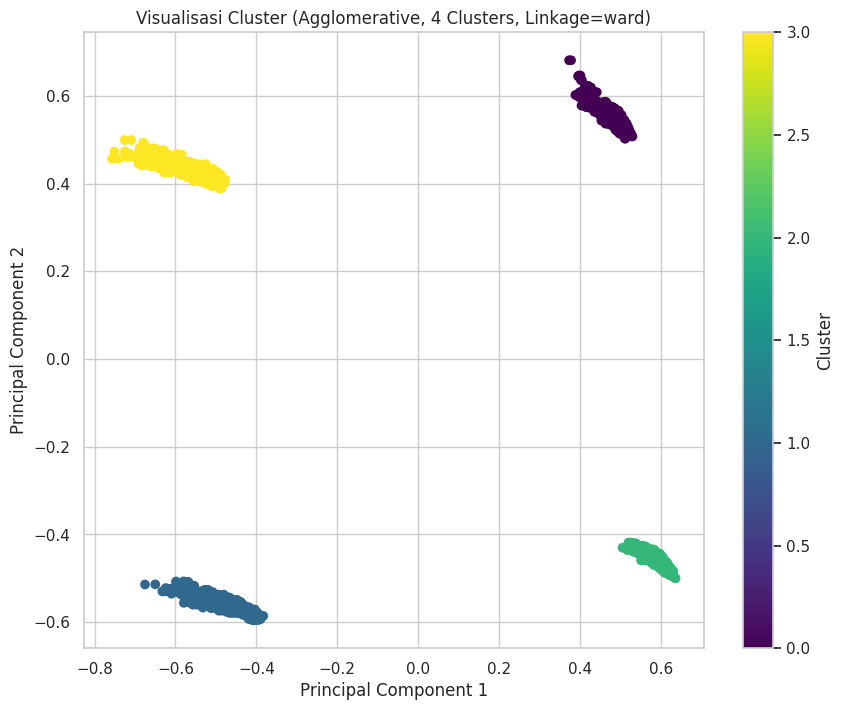

In [ ]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = labels

# Visualisasikan hasil clustering dalam 2D PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Visualisasi Cluster (Agglomerative, {n_clusters} Clusters, Linkage={linkage})')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

### informasi:
* model Agglomerative memiliki skor yang cukup bagus dalam hal ini

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
X = df_model[features].dropna()
threshold_silhouette = 0.65 # Menetapkan threshold Silhouette Score

print(f"Model Agglomerative Clustering dengan Silhouette Score di atas {threshold_silhouette}:")

for n_clusters in range(2, 6):
    for linkage in ['ward', 'complete', 'average', 'single']:
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agg_clustering.fit_predict(X)
        n_labels = len(set(labels))
        # Hanya hitung Silhouette Score jika jumlah cluster valid
        if n_labels > 1 and n_labels < len(X):
            silhouette_avg = silhouette_score(X, labels)
            if silhouette_avg > threshold_silhouette:
                print(f"Model: Agglomerative (n_clusters={n_clusters}, linkage='{linkage}')")
                print(f"Silhouette Score: {silhouette_avg:.4f}\n")

Model Agglomerative Clustering dengan Silhouette Score di atas 0.65:
Model: Agglomerative (n_clusters=4, linkage='ward')
Silhouette Score: 0.6933

Model: Agglomerative (n_clusters=4, linkage='single')
Silhouette Score: 0.6933

Model: Agglomerative (n_clusters=5, linkage='average')
Silhouette Score: 0.6811

Model: Agglomerative (n_clusters=5, linkage='single')
Silhouette Score: 0.6610



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
df = df_model[features].copy()


df = df.dropna()

# Latih model Agglomerative Clustering terbaik sebelumnya untuk mendapatkan label
best_agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
best_labels = best_agg.fit_predict(df)

# Lakukan seleksi fitur univariat
selector = SelectKBest(score_func=f_classif, k=4) # Pilih top k fitur (coba k=4)
fit = selector.fit(df, best_labels)
features_univariate_selected = df.columns[fit.get_support()]
df_univariate_selected = df[features_univariate_selected]

print(f"\nFitur setelah seleksi univariat (k=4): {features_univariate_selected}")

# Terapkan Agglomerative Clustering dengan fitur yang terseleksi berdasarkan univariat statistik
for n_clusters in range(2, 6):
    for linkage in ['ward', 'complete', 'average', 'single']:
        agg_uni = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels_uni = agg_uni.fit_predict(df_univariate_selected)
        silhouette_avg_uni = silhouette_score(df_univariate_selected, labels_uni)
        print(f"Agglomerative (Uni Sel, k=4, n_clusters={n_clusters}, linkage='{linkage}') - Silhouette Score: {silhouette_avg_uni}")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw



Fitur setelah seleksi univariat (k=4): Index(['gk', 'peng', 'jenis_nonmakanan', 'daerah_perkotaan'], dtype='object')
Agglomerative (Uni Sel, k=4, n_clusters=2, linkage='ward') - Silhouette Score: 0.5362369906730767
Agglomerative (Uni Sel, k=4, n_clusters=2, linkage='complete') - Silhouette Score: 0.5362369906730767
Agglomerative (Uni Sel, k=4, n_clusters=2, linkage='average') - Silhouette Score: 0.5362369906730767
Agglomerative (Uni Sel, k=4, n_clusters=2, linkage='single') - Silhouette Score: 0.5362369906730767
Agglomerative (Uni Sel, k=4, n_clusters=3, linkage='ward') - Silhouette Score: 0.6592768258564882
Agglomerative (Uni Sel, k=4, n_clusters=3, linkage='complete') - Silhouette Score: 0.6592768258564882
Agglomerative (Uni Sel, k=4, n_clusters=3, linkage='average') - Silhouette Score: 0.6592768258564882
Agglomerative (Uni Sel, k=4, n_clusters=3, linkage='single') - Silhouette Score: 0.6592768258564882
Agglomerative (Uni Sel, k=4, n_clusters=4, linkage='ward') - Silhouette Score: 0

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Explained Variance Ratio (PCA 2D): [0.50830763 0.4575307 ]
Total Explained Variance (PCA 2D): 0.9658383266902387


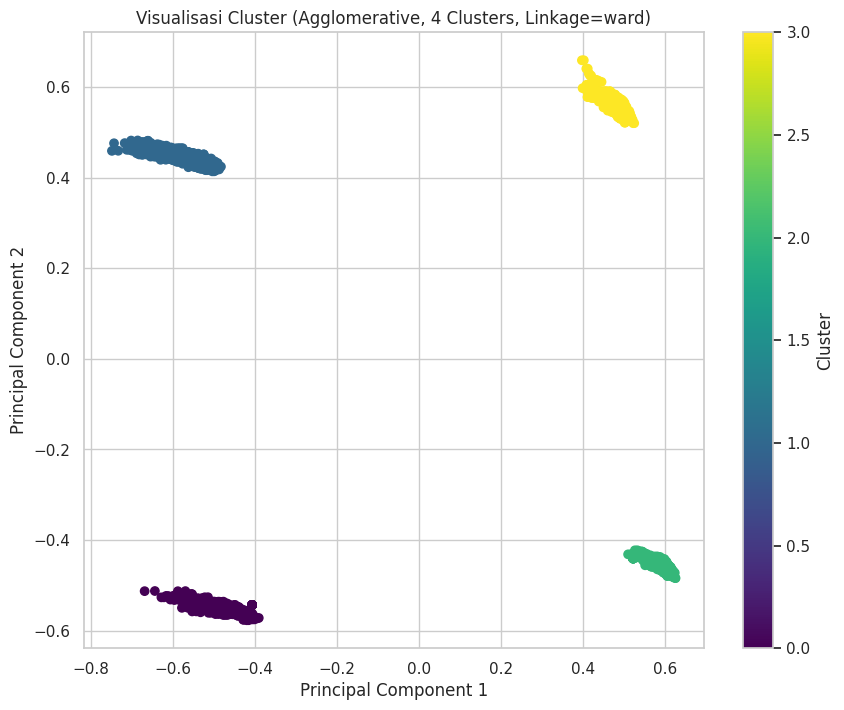


Explained Variance Ratio (PCA 3D): [0.50830763 0.4575307  0.02851484]
Total Explained Variance (PCA 3D): 0.9943531707155702


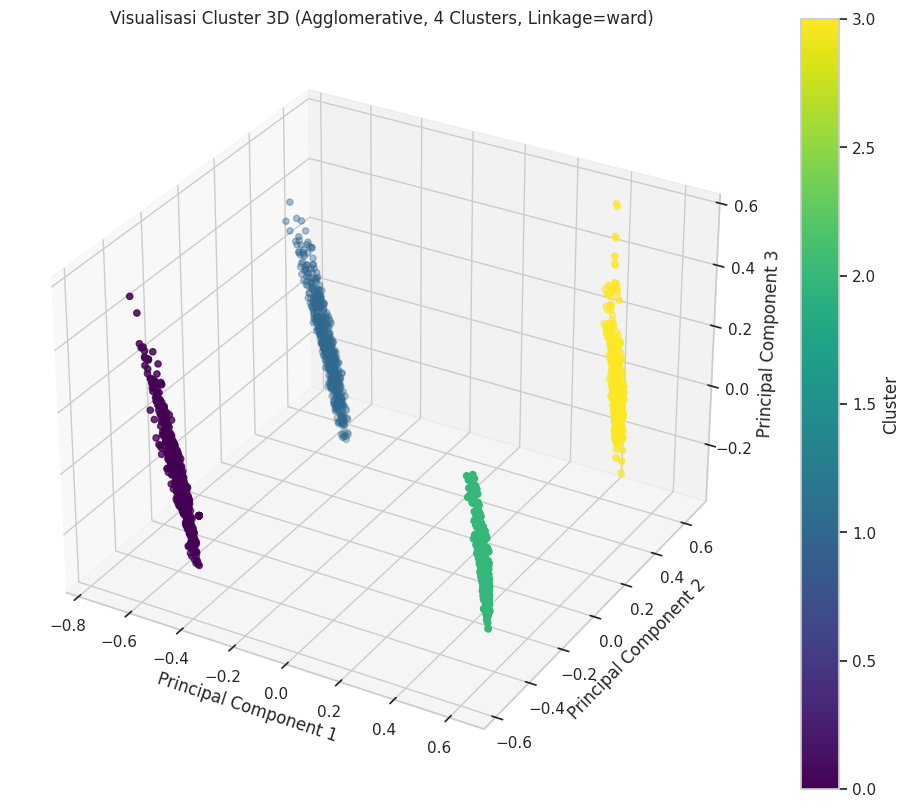

In [ ]:
# dan fitur terpilih sudah ada
features_selected = ['gk', 'peng', 'jenis_nonmakanan', 'daerah_perkotaan']
df_visual = df_model[features_selected].copy()

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
df_visual_imputed = pd.DataFrame(imputer.fit_transform(df_visual), columns=df_visual.columns)

# Terapkan PCA untuk reduksi dimensi (ke 2 komponen untuk visualisasi 2D)
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(df_visual_imputed)
pca_df_2d = pd.DataFrame(data=principal_components_2d, columns=['principal_component_1', 'principal_component_2'])

# Cetak explained variance ratio untuk PCA 2D
print("Explained Variance Ratio (PCA 2D):", pca_2d.explained_variance_ratio_)
print("Total Explained Variance (PCA 2D):", sum(pca_2d.explained_variance_ratio_))

# Latih kembali model Agglomerative Clustering dengan parameter terbaik
n_clusters_best = 4
linkage_best = 'ward'  # Bisa diganti dengan 'complete', 'average', atau 'single'
agg_final = AgglomerativeClustering(n_clusters=n_clusters_best, linkage=linkage_best)
labels_final = agg_final.fit_predict(df_visual_imputed)

# Gabungkan label cluster dengan DataFrame PCA 2D
pca_df_2d['cluster'] = labels_final

# Visualisasikan hasil clustering dalam 2D PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df_2d['principal_component_1'], pca_df_2d['principal_component_2'], c=pca_df_2d['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Visualisasi Cluster (Agglomerative, {n_clusters_best} Clusters, Linkage={linkage_best})')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Jika ingin visualisasi 3D (membutuhkan lebih banyak interpretasi)
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df_visual_imputed)
pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['principal_component_1', 'principal_component_2', 'principal_component_3'])
pca_df_3d['cluster'] = labels_final

# Cetak explained variance ratio untuk PCA 3D
print("\nExplained Variance Ratio (PCA 3D):", pca_3d.explained_variance_ratio_)
print("Total Explained Variance (PCA 3D):", sum(pca_3d.explained_variance_ratio_))



fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(pca_df_3d['principal_component_1'], pca_df_3d['principal_component_2'], pca_df_3d['principal_component_3'], c=pca_df_3d['cluster'], cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'Visualisasi Cluster 3D (Agglomerative, {n_clusters_best} Clusters, Linkage={linkage_best})')
fig.colorbar(scatter_3d, label='Cluster')
plt.show()


In [ ]:
silhouette_avg = silhouette_score(df_visual_imputed, labels_final)

print(f"Silhouette Score after PCA and imputation: {silhouette_avg}")

Silhouette Score after PCA and imputation: 0.8467690255010488


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_scaled_with_labels = df_normalized.copy()
df_scaled_with_labels['Cluster'] = labels_final
print(df_scaled_with_labels.head())

  provinsi    jenis     daerah  tahun    periode        gk       ump  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  0.413212  0.265284   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  0.427424  0.265284   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  0.434360  0.323834   
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  0.457159  0.323834   
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  0.419587  0.265284   

       peng      upah  jenis_nonmakanan  daerah_perkotaan  Cluster  
0  0.207971  0.111796               0.0               1.0        1  
1  0.207971  0.111796               0.0               1.0        1  
2  0.267067  0.211175               0.0               1.0        1  
3  0.267067  0.211175               0.0               1.0        1  
4  0.156954  0.111796               0.0               0.0        0  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here
scaler = MinMaxScaler()

# Asumsikan df_updated (data asli sebelum scaling) masih tersedia
# untuk mendapatkan rentang nilai asli
numerical_features = ['gk', 'ump', 'peng', 'upah']
scaler.fit(df_updated[numerical_features])

# --- Inverse Transform Fitur Numerik ---
df_inverse_transformed = df_normalized.copy()
df_inverse_transformed['cluster'] = labels_final

# Inverse transform hanya pada kolom numerik
df_inverse_transformed[numerical_features] = scaler.inverse_transform(df_inverse_transformed[numerical_features])

print("\nDataFrame Setelah Inverse Transform pada Fitur Numerik dari df_normalized:")
print(df_inverse_transformed[['provinsi', 'jenis', 'daerah', 'tahun', 'periode'] + numerical_features + ['cluster']].head())


DataFrame Setelah Inverse Transform pada Fitur Numerik dari df_normalized:
  provinsi    jenis     daerah  tahun    periode        gk        ump  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0  1900000.0   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0  1900000.0   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0  2118500.0   
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0  2118500.0   
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0  1900000.0   

       peng     upah  cluster  
0  466355.0  11226.0        1  
1  466355.0  11226.0        1  
2  548853.0  13627.0        1  
3  548853.0  13627.0        1  
4  395136.0  11226.0        0  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
summary = df_inverse_transformed.groupby("cluster").agg({
    "jenis_nonmakanan": lambda x: "Mayoritas Non-Makanan" if x.mean() > 0.5 else "Mayoritas Makanan",
    "daerah_perkotaan": lambda x: "Perkotaan" if x.mean() > 0.5 else "Luar Perkotaan",
    "gk": ["mean", "max", "min"],
    "ump": ["mean", "max", "min"],
    "peng": ["mean", "max", "min"],
    "upah": ["mean", "max", "min"],
}).reset_index()

summary.columns = ["_".join(col).replace("_<lambda>", "").rstrip("_")  if len(col) else None for col in summary.columns.values]

print("\nRingkasan Karakteristik Cluster (Skala Asli):")
for _, row in summary.iterrows():
    print(f"""{"cluster".ljust(30)}: {row["cluster"]}
{"Dominasi Pengeluaran".ljust(30)}: {row["jenis_nonmakanan"]}
{"Dominasi Daerah".ljust(30)}: {row["daerah_perkotaan"]}
{"Rata-Rata Garis Kemiskinan".ljust(30)}: Rp {math.floor(row["gk_mean"]):,.2f}
{"Rata-Rata Minimum Upah".ljust(30)}: Rp {math.floor(row["ump_mean"]):,.2f}
{"Rata-Rata Pengeluaran".ljust(30)}: Rp {math.floor(row["peng_mean"]):,.2f}
{"Rata-Rata Upah".ljust(30)}: Rp {math.floor(row["upah_mean"]):,.2f}
""")


Ringkasan Karakteristik Cluster (Skala Asli):
cluster                       : 0
Dominasi Pengeluaran          : Mayoritas Makanan
Dominasi Daerah               : Luar Perkotaan
Rata-Rata Garis Kemiskinan    : Rp 336,741.00
Rata-Rata Minimum Upah        : Rp 2,310,701.00
Rata-Rata Pengeluaran         : Rp 507,353.00
Rata-Rata Upah                : Rp 16,651.00

cluster                       : 1
Dominasi Pengeluaran          : Mayoritas Makanan
Dominasi Daerah               : Perkotaan
Rata-Rata Garis Kemiskinan    : Rp 339,285.00
Rata-Rata Minimum Upah        : Rp 2,310,701.00
Rata-Rata Pengeluaran         : Rp 621,595.00
Rata-Rata Upah                : Rp 16,651.00

cluster                       : 2
Dominasi Pengeluaran          : Mayoritas Non-Makanan
Dominasi Daerah               : Luar Perkotaan
Rata-Rata Garis Kemiskinan    : Rp 101,758.00
Rata-Rata Minimum Upah        : Rp 2,310,701.00
Rata-Rata Pengeluaran         : Rp 404,634.00
Rata-Rata Upah                : Rp 16,651.00

clu

## Analisis Karakteristik Cluster

Berdasarkan hasil clustering, berikut adalah analisis karakteristik untuk setiap cluster:

**Cluster 0:**
* **Dominasi Pengeluaran**: Mayoritas Makanan
* **Dominasi Daerah**: Luar Perkotaan
* **Rata-Rata Garis Kemiskinan**: Rp 336,741.00
* **Rata-Rata Minimum Upah**: Rp 2,310,701.00
* **Rata-Rata Pengeluaran**: Rp 507,353.00
* **Rata-Rata Upah**: Rp 16,651.00

**Interpretasi Cluster 0:** Cluster ini cenderung mewakili wilayah luar perkotaan di mana sebagian besar pengeluaran rumah tangga dialokasikan untuk makanan. Tingkat garis kemiskinan relatif tinggi, meskipun UMP juga cukup tinggi. Rata-rata pengeluaran sedang, namun rata-rata upah terlihat sangat rendah.

---

**Cluster 1:**
* **Dominasi Pengeluaran**: Mayoritas Makanan
* **Dominasi Daerah**: Perkotaan
* **Rata-Rata Garis Kemiskinan**: Rp 339,285.00
* **Rata-Rata Minimum Upah**: Rp 2,310,701.00
* **Rata-Rata Pengeluaran**: Rp 621,595.00
* **Rata-Rata Upah**: Rp 16,651.00

**Interpretasi Cluster 1:** Cluster ini didominasi oleh wilayah perkotaan dengan fokus pengeluaran pada makanan. Garis kemiskinan sedikit lebih tinggi dari Cluster 0, dengan UMP yang sama. Rata-rata pengeluaran lebih tinggi, yang mungkin mencerminkan biaya hidup di perkotaan, namun rata-rata upah tetap sangat rendah.

---

**Cluster 2:**
* **Dominasi Pengeluaran**: Mayoritas Non-Makanan
* **Dominasi Daerah**: Luar Perkotaan
* **Rata-Rata Garis Kemiskinan**: Rp 101,758.00
* **Rata-Rata Minimum Upah**: Rp 2,310,701.00
* **Rata-Rata Pengeluaran**: Rp 404,634.00
* **Rata-Rata Upah**: Rp 16,651.00

**Interpretasi Cluster 2:** Cluster ini mewakili wilayah luar perkotaan dengan pengeluaran yang lebih dominan untuk non-makanan. Garis kemiskinan jauh lebih rendah dibandingkan Cluster 0 dan 1, dengan UMP yang sama. Rata-rata pengeluaran juga lebih rendah, dan rata-rata upah tetap sangat rendah.

---

**Cluster 3:**
* **Dominasi Pengeluaran**: Mayoritas Non-Makanan
* **Dominasi Daerah**: Perkotaan
* **Rata-Rata Garis Kemiskinan**: Rp 133,836.00
* **Rata-Rata Minimum Upah**: Rp 2,310,701.00
* **Rata-Rata Pengeluaran**: Rp 740,248.00
* **Rata-Rata Upah**: Rp 16,651.00

**Interpretasi Cluster 3:** Cluster ini didominasi oleh wilayah perkotaan dengan fokus pengeluaran pada non-makanan. Garis kemiskinan rendah, namun lebih tinggi dari Cluster 2. UMP sama, namun rata-rata pengeluaran paling tinggi di antara semua cluster, sementara rata-rata upah tetap sangat rendah.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

In [ ]:
# drop table one hot encoding
df_inverse_transformed = df_inverse_transformed.drop(columns=['jenis_nonmakanan', 'daerah_perkotaan'], errors='ignore')

print(df_inverse_transformed.head())


  provinsi    jenis     daerah  tahun    periode        gk        ump  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0  1900000.0   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0  1900000.0   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0  2118500.0   
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0  2118500.0   
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0  1900000.0   

       peng     upah  cluster  
0  466355.0  11226.0        1  
1  466355.0  11226.0        1  
2  548853.0  13627.0        1  
3  548853.0  13627.0        1  
4  395136.0  11226.0        0  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
nama_file_csv = 'hasil_clustering.csv'
df_inverse_transformed.to_csv(nama_file_csv, index=False)

print(f"\nDataFrame berhasil disimpan ke dalam file: {nama_file_csv}")


DataFrame berhasil disimpan ke dalam file: hasil_clustering.csv
